The calculated Dj s are: [39, 42, 38, 40, 39, 45, 42, 43, 43, 39, 43, 45, 45, 40, 41, 45, 41, 42, 51, 42, 42, 45, 45, 36, 41, 39, 46, 45, 51, 48, 47, 48, 47, 44, 46, 45, 50, 47, 49, 48, 45, 56, 44, 50, 45, 46, 55, 47, 50, 47, 44, 42, 49, 47, 46, 48, 45]


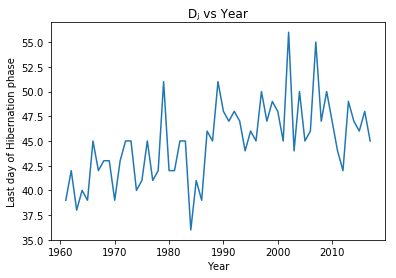

In [1]:
#Problem 2-1
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from sklearn import metrics
df=pd.read_csv("modified tokyo.csv")
D=[]
year=[i for i in range(1961,2018)]

for i in range(1961,2018):
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    tf=0
    for j in range(90):
        tf=tf+df2.iloc[j,9]
    tf=tf/90
    fi=35.67
    L=4
    Dj=136.75-(7.689*fi)+(0.133*fi**2)-1.307*mt.log(L)+0.144*tf+0.285*tf**2
    D.append(Dj)
    
D=[int(round(i)) for i in D]
print("The calculated Dj s are:",D)
plt.plot(year,D) 
plt.ylabel("Last day of Hibernation phase")
plt.xlabel("Year")
plt.title("D\u2C7C vs Year")
plt.show()

    

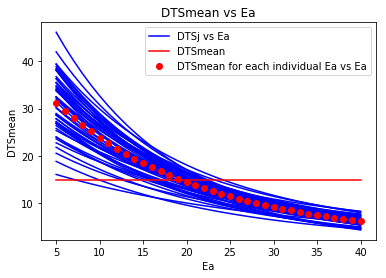

[31.193701194078081, 29.536403945654662, 27.979419053756086, 26.516205658119681, 25.140673415802912, 23.847150092208537, 22.630351569733168, 21.485354087952466, 20.407568543980194, 19.392716695168126, 18.43680911874841, 17.536124794450572, 16.687192186633919, 15.886771712140128, 15.131839488957574, 14.419572268965348, 13.747333465545795, 13.11266019377639, 12.513251247281866, 11.946955941691376, 11.411763760044591, 10.90579474046204, 10.42729055097411, 9.9746062006210217, 9.5462023398224733, 9.1406381065969313, 8.7565644785112653, 8.3927180932843175, 8.0479155037734884, 7.7210478356606513, 7.4110758185399508, 7.1170251633115393, 6.8379822608163412, 6.5730901785216238, 6.3215449337971128, 6.0825920239189344]


In [2]:
Ts=(17+273)
DTS=[]
for i in range(1961,2018):
    DTS.append([])
    if i in [1966,1971,1985,1994,2008]:
        DTS[i-1961].append([])
        continue
    
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    for j in range(5,41):
        E=j*4184
        dts=0
        for k in range(D[i-1961],bdi[0]+1):
            T=(df2.iloc[k,9])+273
            dts=dts+np.exp((E*(T-Ts))/(8.314*T*Ts))
        DTS[i-1961].append(dts)
 
DTSmean=[]
for i in range(36):
    mean=0
    for j in range(1961,2018):
        if j in [1966,1971,1985,1994,2008]:
            continue
        mean=mean+DTS[j-1961][i]
    mean=mean/52
    DTSmean.append(mean)


E=[E for E in range(5,41)]
for i in range (1961,2018):
    if i in [1966,1971,1985,1994,2008]:
        continue
    b=DTS[i-1961]
    plt.plot(E,b,'b-')
    
plt.plot(E,DTS[0],'b-',label='DTSj vs Ea')
  
DTSmeanavg = np.mean(DTSmean)
DTSavgmean = np.ones(len(E)) * DTSmeanavg
plt.plot(E, DTSavgmean, 'r', label='DTSmean')

plt.plot(E,DTSmean, 'ro', label='DTSmean for each individual Ea vs Ea')
plt.ylabel("DTSmean")
plt.xlabel("Ea")
plt.title("DTSmean vs Ea")
plt.legend()
plt.show()   
print(DTSmean)


The value of Ts is 290 Kelvin
The minimum mean square error is obtained for Ea: 28


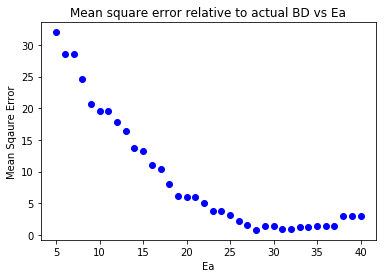

In [47]:
meansquareerror=[]
print('The value of Ts is {} Kelvin'.format(Ts))
for i in range(5,41):
    squareerror=0
    Ea=i*4184
    
    for j in [1966,1971,1985,1994,2008]:
        df2=df.loc[df['year'] == j]
        df2.index=range(len(df2))
        Dj=D[j-1961]
        d=Dj-1
        dts=0
        while dts<=(DTSmean[i-5]) :
            T=(df2.iloc[d,9])+273
            dts=dts+np.exp((Ea*(T-Ts))/(8.314*T*Ts))
            d=d+1
        pbd=d
        abd=df2.loc[df2['bloom'].isin([1])].index.tolist()[0]
        
        squareerror=squareerror+(abd-pbd)**2
        
    squareerror=squareerror/5
    meansquareerror.append(squareerror)
print("The minimum mean square error is obtained for Ea:", E[meansquareerror.index(min(meansquareerror))])

plt.plot(E,meansquareerror, 'bo')
plt.ylabel("Mean Sqaure Error")
plt.xlabel("Ea")
plt.title('Mean square error relative to actual BD vs Ea')
plt.show()

In [48]:
print("The calculated DTSmean for Ea=28 is:", DTSmean[28-5])
abd=[]
pbd=[]
error=[]
Ea=28*4184
for i in [1966,1971,1985,1994,2008]:
    Dj=D[i-1961]
    d=Dj-1
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    dts=0
    while dts<=(DTSmean[28-5]) :
        T=(df2.iloc[d,9])+273
        dts=dts+np.exp((Ea*(T-Ts))/(8.314*T*Ts))
        d=d+1
    pbd.append(d+1)
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    abd.append(bdi[0]+1)
    error.append(bdi[0]-d)
print("The errors are:", error)
rscore_linear_regression=metrics.r2_score(abd,pbd)
print("The R^2 score using Ea=28 kcal and corresponding Dj and DTSmean",rscore_linear_regression) 

The calculated DTSmean for Ea=28 is: 9.97460620062
The errors are: [0, 1, 1, -1, -1]
The R^2 score using Ea=28 kcal and corresponding Dj and DTSmean 0.97084548105
